In [18]:
import numpy as np
import matplotlib.pyplot as plt

# SOS signal strategy

Supposing that you only care about 10-5, what is the optimal way to spend signals to get them?

Assumptions:
- All stages are equally likely

Possible strategies:
- Pull until 10, then stop.
- Pull until 10, then keep pulling conditional on how many pulls left

# Pull until 10, then stop

In [4]:
stages = range(3,11)

In [14]:
SAMPLE_SIZE = 100000
type(SAMPLE_SIZE)

POOL_SIZE = 1000000
entropy_pool = np.random.rand(POOL_SIZE)
rand_p = 0

SOS_SIGNALS = 9

pull_history = np.zeros([SOS_SIGNALS,SOS_SIGNALS])
for i in range(SAMPLE_SIZE):
    PULL_NO = 0
    REMAINING = SOS_SIGNALS
    j = 0
    while PULL_NO < SOS_SIGNALS:
        if entropy_pool[rand_p] < 1 / REMAINING:
            pull_history[j,PULL_NO] += j + 1
            j += 1
            REMAINING += 1
            
        REMAINING -= 1
        PULL_NO += 1
        rand_p += 1
        if rand_p == POOL_SIZE:
            entropy_pool = np.random.rand(POOL_SIZE)
            rand_p = 0
        

        
    
        

#     pulls = np.random.choice(stages, replace=False, size=8)
#     location = np.where(pulls==10)[0][0]
#     if i%(SAMPLE_SIZE//10) == 0:
#         print(i, pulls, location, pulls[location+1:] + [10])
#     pull_history[location] += 1
pull_history / np.sum(pull_history)

array([[3.27963639e-02, 3.34282095e-02, 3.37351911e-02, 3.27695403e-02,
        3.30973847e-02, 3.29125997e-02, 3.33298562e-02, 3.29424037e-02,
        3.30288354e-02],
       [0.00000000e+00, 7.12912600e-03, 1.51225691e-02, 2.53990016e-02,
        3.56694732e-02, 4.89799568e-02, 6.56761791e-02, 8.75463825e-02,
        1.22136950e-01],
       [0.00000000e+00, 0.00000000e+00, 1.13553386e-03, 3.85366217e-03,
        9.83533269e-03, 1.85708964e-02, 3.30467178e-02, 5.59898666e-02,
        1.01491692e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.54981000e-04,
        6.55688846e-04, 2.63467700e-03, 7.12912600e-03, 1.55696297e-02,
        3.45130765e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.96080769e-05, 5.96080769e-05, 5.51374711e-04, 2.08628269e-03,
        6.33335817e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.78824231e-05, 0.00000000e+00, 1.25176961e-04,
        4.6

In [15]:
exp_vals = np.zeros([SOS_SIGNALS,SOS_SIGNALS])
for i in range(SOS_SIGNALS):
    for j in range(SOS_SIGNALS):
        exp_vals[i,j] = pull_history[i,j] / (i+j+1)
exp_vals

array([[1.10040000e+04, 5.60800000e+03, 3.77300000e+03, 2.74875000e+03,
        2.22100000e+03, 1.84050000e+03, 1.59757143e+03, 1.38162500e+03,
        1.23133333e+03],
       [0.00000000e+00, 7.97333333e+02, 1.26850000e+03, 1.70440000e+03,
        1.99466667e+03, 2.34771429e+03, 2.75450000e+03, 3.26377778e+03,
        4.09800000e+03],
       [0.00000000e+00, 0.00000000e+00, 7.62000000e+01, 2.15500000e+02,
        4.71428571e+02, 7.78875000e+02, 1.23200000e+03, 1.87860000e+03,
        3.09572727e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.42857143e+00,
        2.75000000e+01, 9.82222222e+01, 2.39200000e+02, 4.74909091e+02,
        9.65000000e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.22222222e+00, 2.00000000e+00, 1.68181818e+01, 5.83333333e+01,
        1.63461538e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.45454545e-01, 0.00000000e+00, 3.23076923e+00,
        1.1

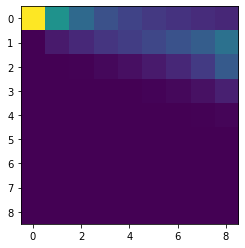

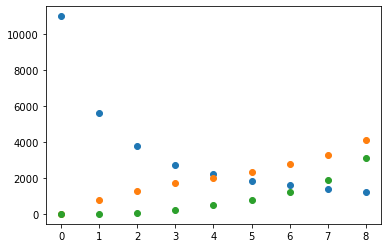

In [17]:
plt.imshow(exp_vals)
plt.figure()
plt.plot(exp_vals[0], "o")
plt.plot(exp_vals[1], "o")
plt.plot(exp_vals[2], "o")

In [50]:
pull_history[0]/pull_history[0].sum()

array([0.125108, 0.125495, 0.125516, 0.124846, 0.125602, 0.124381,
       0.124504, 0.124548])

Just to confirm this with pen and paper: Let $P(N)$ denote the probability of finding the correct mission after $N$ pulls. 
$$
P(0) =& 1/8\\
P(1) =& !P(0) * P(1)|!P(0)
=& 7/8 
$$

In [8]:
pulls

array([ 5,  4, 10,  3,  9,  6,  8,  7])

In [13]:
np.where(pulls==10)[0][0]

2

In [6]:
stages

range(3, 11)